In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/FastAI/

/content/drive/MyDrive/FastAI


In [ ]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
from models.MDResNet import *

print(torch.cuda.is_available())

True


In [ ]:
path = Path('./data/img/undersample_500')
path.ls()

(#9) [Path('data/img/undersample_500/1'),Path('data/img/undersample_500/2'),Path('data/img/undersample_500/3'),Path('data/img/undersample_500/5'),Path('data/img/undersample_500/4'),Path('data/img/undersample_500/6'),Path('data/img/undersample_500/7'),Path('data/img/undersample_500/9'),Path('data/img/undersample_500/8')]

## Dataset & Training

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


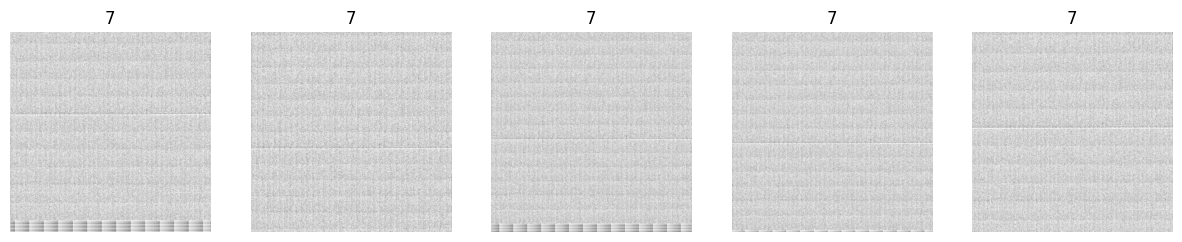

In [ ]:
# Data Block
data_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(1024, min_scale=0.50)
)

# Batch
dls = data_block.dataloaders(path, bs=32)

# Models : MDResNet-18/34, MDDenseResNet-18/34
model = MDResNet18(pretrained=False)

dls.train.show_batch(max_n=5, nrows=1, unique=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(valley=0.0002754228771664202)

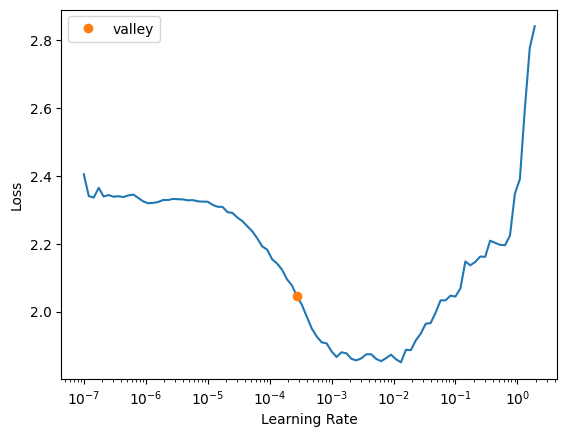

In [ ]:
# Learner with Model-ResNet-18/34/50
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate]).to_fp16()

# Strategy 1 : Find the optimal learning rate and Train
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.178312,3.096322,0.310345,0.689655,02:57
1,0.723127,1.651106,0.564496,0.435504,01:43
2,0.566556,1.884870,0.560664,0.439336,01:42
3,0.508269,2.539707,0.425287,0.574713,01:42
4,0.450219,2.446870,0.590038,0.409962,01:42
5,0.431447,1.824502,0.528736,0.471264,01:41
6,0.351947,1.785206,0.602810,0.397190,01:41
7,0.319701,1.658087,0.777778,0.222222,01:41
8,0.264329,2.012113,0.690932,0.309068,01:41
9,0.269400,1.653407,0.606641,0.393359,01:41


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

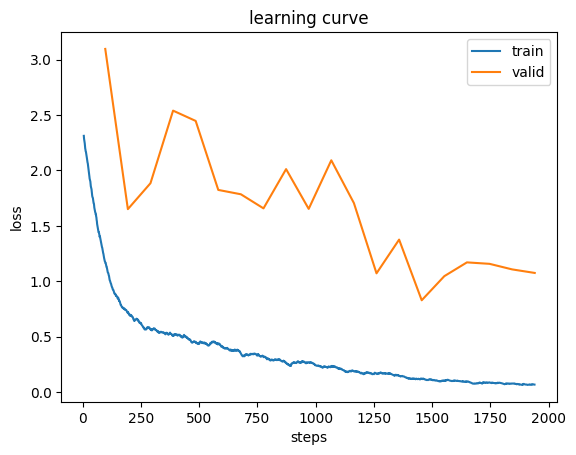

In [ ]:
lr_min = 3e-4
learn.fit_one_cycle(20, slice(lr_min))

# Plot
learn.recorder.plot_loss()
#learn.recorder.plot_metrics()